In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
pip install scikit-learn-extra

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8)
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
original = pd.read_csv('/content/drive/MyDrive/EM:IP/정리/최종 데이터 파일/variables/3_OutliersNormalization_3_FullC_7.0_with_score.csv', sep=',')
original.head()

,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,...,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code,ranking,score,rank_code
0,ARE000018804820,ARE,3.837299,2.442347,0.000000,2.442347,3.732896,2.261763,4.091006,4.693181,...,1.360977,1.928619,2,10,1,0,1,40,411,4
1,ARE000039910042,ARE,2.476538,1.667707,3.303217,3.449988,3.081910,1.435085,4.266896,4.557030,...,3.397858,0.968839,5,43,1,0,1,40,411,4
2,ARE000006001557,ARE,3.214868,1.568616,3.449988,3.563883,2.332144,1.458615,4.489759,4.622027,...,3.430756,1.509397,4,25,1,0,1,40,411,4
3,ARE000024506213,ARE,1.740466,1.667707,3.157000,3.325036,2.151762,1.902108,3.678829,3.968403,...,2.091864,1.145637,4,18,1,0,1,40,411,4
4,ARE000006601699,ARE,3.353407,2.549445,0.000000,2.549445,3.005683,1.163151,3.987130,4.321480,...,2.674149,1.623189,2,13,1,0,1,40,411,4


In [6]:
original[original.isnull().any(axis=1)]

,ID,cnt,time_A_total,time_b1,time_b2,time_B_total,time_start,time_end,time_solving,time_total,...,time_not_answer,avg_time_btw_events,length,events_num,credit,OECD,cnt_code,ranking,score,rank_code


In [7]:
df = original[['ID','time_A_total','time_start','time_answer','time_not_answer','time_solving','avg_time_btw_events','length']]
df.set_index('ID', inplace=True)
df

,time_A_total,time_start,time_answer,time_not_answer,time_solving,avg_time_btw_events,length
ID,,,,,,,
ARE000018804820,3.837299,3.732896,4.041295,1.360977,4.091006,1.928619,2
ARE000039910042,2.476538,3.081910,3.747148,3.397858,4.266896,0.968839,5
ARE000006001557,3.214868,2.332144,4.080922,3.430756,4.489759,1.509397,4
ARE000024506213,1.740466,2.151762,3.481240,2.091864,3.678829,1.145637,4
ARE000006601699,3.353407,3.005683,3.698830,2.674149,3.987130,1.623189,2
...,...,...,...,...,...,...,...
USA000015004612,2.208274,2.815409,2.856470,0.955511,2.944439,1.178655,2
USA000015004637,3.288402,3.034953,3.645450,1.686399,3.754199,1.642873,2
USA000007902358,3.608212,3.246491,3.908015,0.875469,3.935740,1.984444,2


In [8]:
df = df[np.isfinite(df).all(1)]
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7092 entries, ARE000018804820 to USA000007902381
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_A_total         7092 non-null   float64
 1   time_start           7092 non-null   float64
 2   time_answer          7092 non-null   float64
 3   time_not_answer      7092 non-null   float64
 4   time_solving         7092 non-null   float64
 5   avg_time_btw_events  7092 non-null   float64
 6   length               7092 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 443.2+ KB


In [9]:
df_2 = df[['time_start','time_not_answer','time_A_total']]
df_2

,time_start,time_not_answer,time_A_total
ID,,,
ARE000018804820,3.732896,1.360977,3.837299
ARE000039910042,3.081910,3.397858,2.476538
ARE000006001557,2.332144,3.430756,3.214868
ARE000024506213,2.151762,2.091864,1.740466
ARE000006601699,3.005683,2.674149,3.353407
...,...,...,...
USA000015004612,2.815409,0.955511,2.208274
USA000015004637,3.034953,1.686399,3.288402
USA000007902358,3.246491,0.875469,3.608212


In [10]:
x = df_2.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_2.columns, index = df_2.index)
df_scale

,time_start,time_not_answer,time_A_total
ID,,,
ARE000018804820,1.492861,-0.128915,1.089504
ARE000039910042,0.331750,1.706046,-0.223363
ARE000006001557,-1.005547,1.735683,0.488979
ARE000024506213,-1.327279,0.529518,-0.933528
ARE000006601699,0.195789,1.054079,0.622642
...,...,...,...
USA000015004612,-0.143587,-0.494185,-0.482185
USA000015004637,0.247996,0.164248,0.559925
USA000007902358,0.625299,-0.566293,0.868479


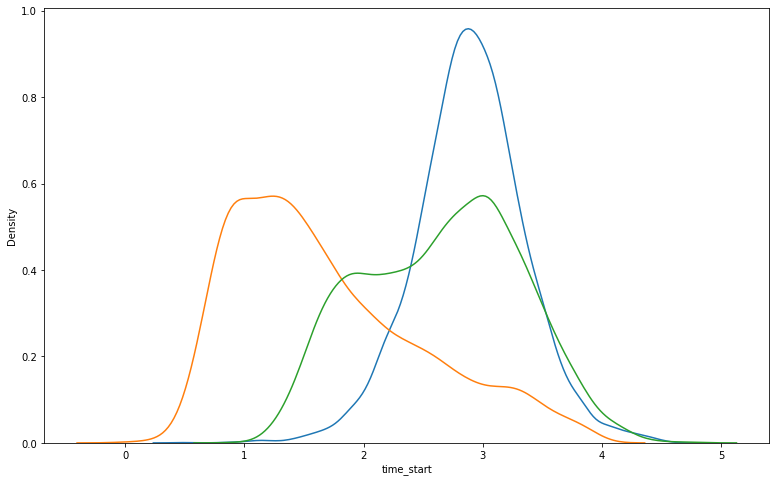

In [11]:
sns.kdeplot(df['time_start'])
sns.kdeplot(df['time_not_answer'])
sns.kdeplot(df['time_A_total'])

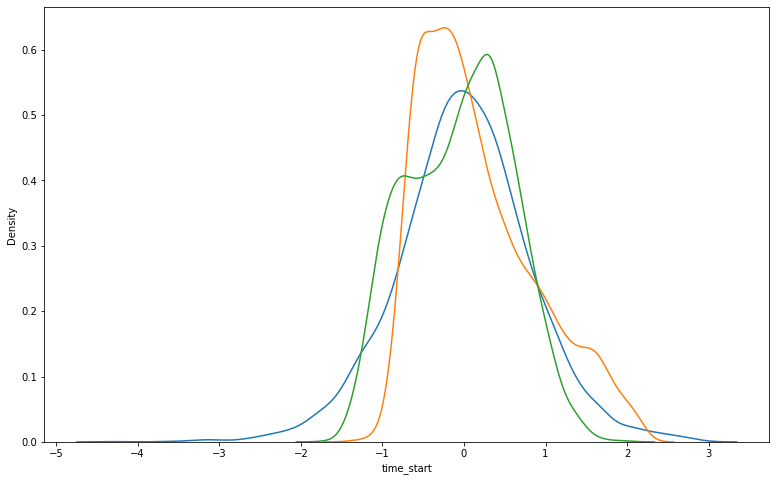

In [12]:
sns.kdeplot(df_scale['time_start'])
sns.kdeplot(df_scale['time_not_answer'])
sns.kdeplot(df_scale['time_A_total'])

100%|██████████| 14/14 [00:24<00:00,  1.73s/it]


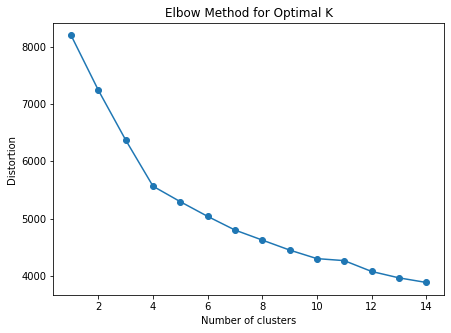

In [13]:
distortions = []
for i in tqdm(range(1, 15)):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
num = 4
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[3 1 1 ... 3 0 1]


In [15]:
df_scale['cluster'] = kmedoids.labels_
df_scale

,time_start,time_not_answer,time_A_total,cluster
ID,,,,
ARE000018804820,1.492861,-0.128915,1.089504,3
ARE000039910042,0.331750,1.706046,-0.223363,1
ARE000006001557,-1.005547,1.735683,0.488979,1
ARE000024506213,-1.327279,0.529518,-0.933528,2
ARE000006601699,0.195789,1.054079,0.622642,1
...,...,...,...,...
USA000015004612,-0.143587,-0.494185,-0.482185,2
USA000015004637,0.247996,0.164248,0.559925,3
USA000007902358,0.625299,-0.566293,0.868479,3


# 두 변수 상관이 너무 높음

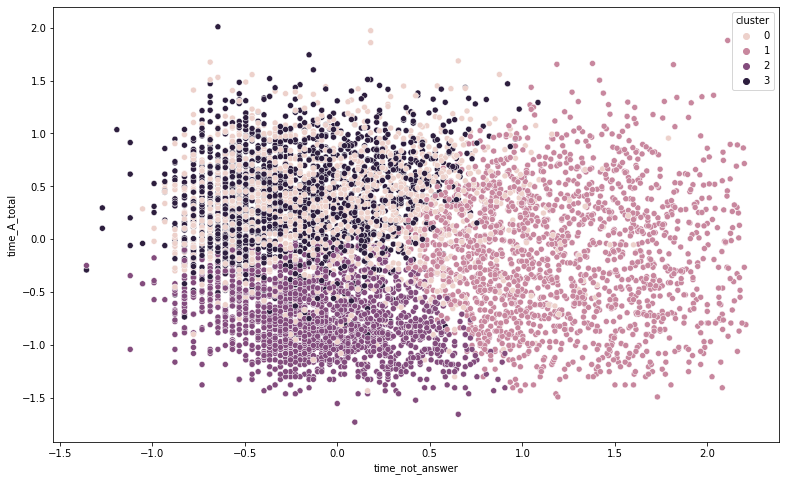

In [16]:
sns.scatterplot(data=df_scale, x="time_not_answer", y="time_A_total", hue="cluster")

Text(0.5, 0, 'time_A_total')

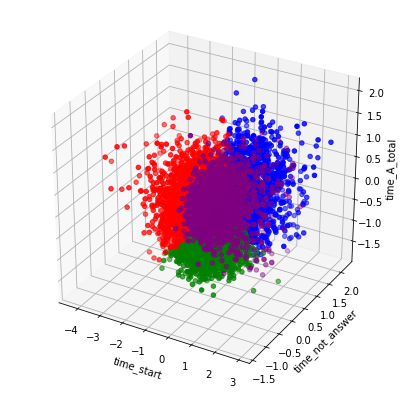

In [17]:
# 3차원 코드 참고
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_start']
    y = df_scale[df_scale['cluster'] == i]['time_not_answer']
    z = df_scale[df_scale['cluster'] == i]['time_A_total']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_start')
ax.set_ylabel('time_not_answer')
ax.set_zlabel('time_A_total')

In [18]:
a = df_scale['cluster']
a

ID
ARE000018804820    3
ARE000039910042    1
ARE000006001557    1
ARE000024506213    2
ARE000006601699    1
                  ..
USA000015004612    2
USA000015004637    3
USA000007902358    3
USA000007902371    0
USA000007902381    1
Name: cluster, Length: 7092, dtype: int64

In [19]:
original_a = pd.merge(original, a, left_on='ID', right_on='ID', how='left')
print(original_a)

                   ID  cnt  time_A_total   time_b1   time_b2  time_B_total  \
0     ARE000018804820  ARE      3.837299  2.442347  0.000000      2.442347   
1     ARE000039910042  ARE      2.476538  1.667707  3.303217      3.449988   
2     ARE000006001557  ARE      3.214868  1.568616  3.449988      3.563883   
3     ARE000024506213  ARE      1.740466  1.667707  3.157000      3.325036   
4     ARE000006601699  ARE      3.353407  2.549445  0.000000      2.549445   
...               ...  ...           ...       ...       ...           ...   
7087  USA000015004612  USA      2.208274  2.230014  0.000000      2.230014   
7088  USA000015004637  USA      3.288402  2.525729  0.000000      2.525729   
7089  USA000007902358  USA      3.608212  2.631889  0.000000      2.631889   
7090  USA000007902371  USA      3.535145  2.821379  0.000000      2.821379   
7091  USA000007902381  USA      2.312535  1.931521  3.919991      4.030695   

      time_start  time_end  time_solving  time_total  ...  \
0 

In [21]:
original_a.to_csv('5_Clustering_2_start,notanswer,Atotal_4C.csv', index = False)